In [2]:
import pandas as pd
df1 = pd.read_csv("Housing.csv")

In [6]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df1.shape

(545, 13)

In [12]:
df1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [58]:
df2 = df1.drop(['stories', 'mainroad','basement', 'hotwaterheating', 'prefarea'],axis="columns")
df2.head()

,price,area,bedrooms,bathrooms,guestroom,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,no,yes,2,furnished
1,12250000,8960,4,4,no,yes,3,furnished
2,12250000,9960,3,2,no,no,2,semi-furnished
3,12215000,7500,4,2,no,yes,3,furnished
4,11410000,7420,4,1,yes,yes,2,furnished


In [62]:
df2['guestroom'] = df2['guestroom'].replace({'yes': 1, 'no': 0})
df2['airconditioning'] = df2['airconditioning'].replace({'yes': 1, 'no': 0})
df2.head()

,price,area,bedrooms,bathrooms,guestroom,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,0,1,2,furnished
1,12250000,8960,4,4,0,1,3,furnished
2,12250000,9960,3,2,0,0,2,semi-furnished
3,12215000,7500,4,2,0,1,3,furnished
4,11410000,7420,4,1,1,1,2,furnished


In [64]:
df2 = pd.get_dummies(df2, columns=['furnishingstatus'], drop_first=True)
df2.head()

,price,area,bedrooms,bathrooms,guestroom,airconditioning,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,0,1,2,False,False
1,12250000,8960,4,4,0,1,3,False,False
2,12250000,9960,3,2,0,0,2,True,False
3,12215000,7500,4,2,0,1,3,False,False
4,11410000,7420,4,1,1,1,2,False,False


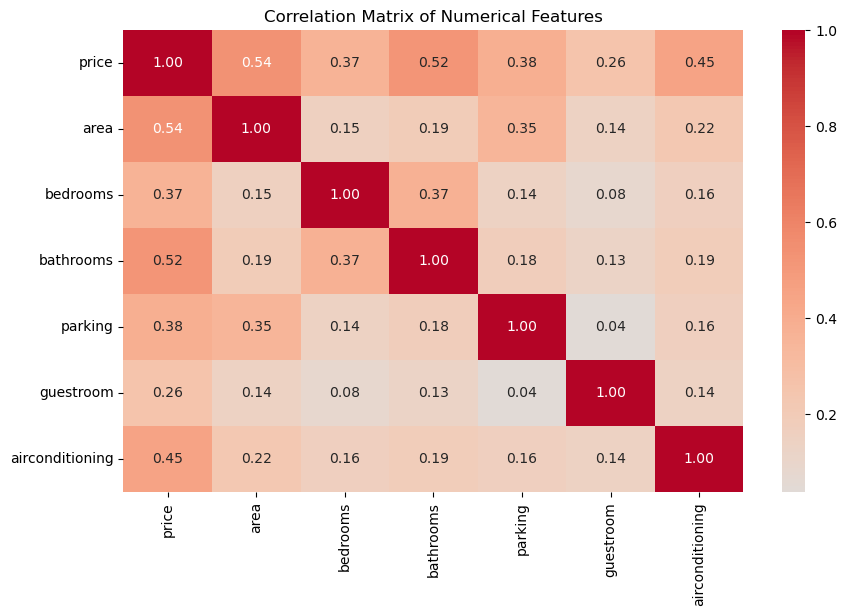

In [68]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns (include binary categoricals)
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'parking', 'guestroom', 'airconditioning']
corr_matrix = df2[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [80]:
area_means = df2.groupby('area')['price'].mean().to_dict()

# Apply encoding
df2['area_target_encoded'] = df2['area'].map(area_means)
df2.head()

,price,area,bedrooms,bathrooms,guestroom,airconditioning,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_target_encoded
0,13300000,7420,4,2,0,1,2,False,False,12355000.0
1,12250000,8960,4,4,0,1,3,False,False,12250000.0
2,12250000,9960,3,2,0,0,2,True,False,12250000.0
3,12215000,7500,4,2,0,1,3,False,False,11532500.0
4,11410000,7420,4,1,1,1,2,False,False,12355000.0


In [84]:
df2.nunique()

price                              219
area                               284
bedrooms                             6
bathrooms                            4
guestroom                            2
airconditioning                      2
parking                              4
furnishingstatus_semi-furnished      2
furnishingstatus_unfurnished         2
area_target_encoded                197
dtype: int64

In [90]:
df3 = df2.drop(["area"], axis = "columns")
df3.head()

,price,bedrooms,bathrooms,guestroom,airconditioning,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_target_encoded
0,13300000,4,2,0,1,2,False,False,12355000.0
1,12250000,4,4,0,1,3,False,False,12250000.0
2,12250000,3,2,0,0,2,True,False,12250000.0
3,12215000,4,2,0,1,3,False,False,11532500.0
4,11410000,4,1,1,1,2,False,False,12355000.0


In [92]:

from sklearn.model_selection import train_test_split

X = df3[['bedrooms', 'bathrooms', 'guestroom', 'airconditioning', 
        'parking', 'furnishingstatus_semi-furnished', 
        'furnishingstatus_unfurnished', 'area_target_encoded']]
y = df3['price']

# Split data into train/test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest 

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [104]:

# Get R² score (1.0 = perfect prediction)
train_score = rf.score(X_train, y_train)  # R² on training data
test_score = rf.score(X_test, y_test)    # R² on test data
print(f"Train R²: {train_score:.3f}, Test R²: {test_score:.3f}")

Train R²: 0.957, Test R²: 0.760


Feature Importance

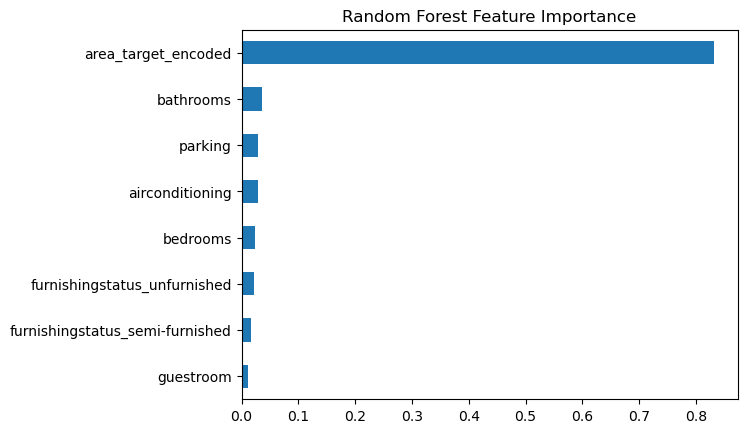

In [106]:

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

In [108]:

import joblib

# Save the model to a file
joblib.dump(rf, 'random_forest_model.pkl')  # .pkl or .joblib extension

['random_forest_model.pkl']

In [110]:

# Create a DataFrame with your input values
input_data = pd.DataFrame([{
    'bedrooms': 3,
    'bathrooms': 2,
    'guestroom': 1,          # 1 = "yes"
    'airconditioning': 1,    # 1 = "yes"
    'parking': 1,
    'furnishingstatus_semi-furnished': 0,
    'furnishingstatus_unfurnished': 0,  # 0 means "furnished" (reference category)
    'area_target_encoded': 450000       # Pre-encoded value for the area
}])

In [126]:
import joblib

# Load the saved model
model = joblib.load('random_forest_model.pkl')  # Or 'model_and_encoder.pkl' if bundled

# Get the # Get the predicted price
predicted_price = model.predict(input_data)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $2,263,607.50


In [131]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
